# Simple Linear Regression - Weight Gain Vs Calories Consumed 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cal_cons = pd.read_csv("G:\ExcelR\Assignments\simple linear regression\calories_consumed.csv")

In [3]:
cal_cons.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [4]:
cal_cons.columns = ["Wt_gain","Cal"]

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

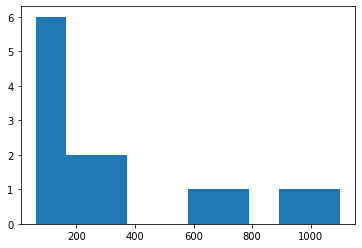

In [5]:
plt.hist(cal_cons.Wt_gain)

{'whiskers': [<matplotlib.lines.Line2D at 0x3423fba748>,
 'caps': [<matplotlib.lines.Line2D at 0x3423fbae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x3423fba320>],
 'medians': [<matplotlib.lines.Line2D at 0x3423fca518>],
 'fliers': [<matplotlib.lines.Line2D at 0x3423fca860>],
 'means': []}

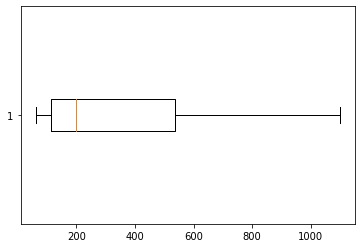

In [6]:
plt.boxplot(cal_cons.Wt_gain,0,'rs',0)

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

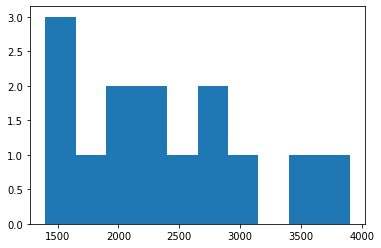

In [7]:
plt.hist(cal_cons.Cal)

{'whiskers': [<matplotlib.lines.Line2D at 0x342409dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x34240ab710>,
 'boxes': [<matplotlib.lines.Line2D at 0x342409dba8>],
 'medians': [<matplotlib.lines.Line2D at 0x34240abda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x34240abe48>],
 'means': []}

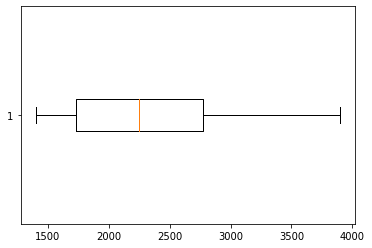

In [8]:
plt.boxplot(cal_cons.Cal,0,'rs',0)

Text(0, 0.5, 'Cal_consumed')

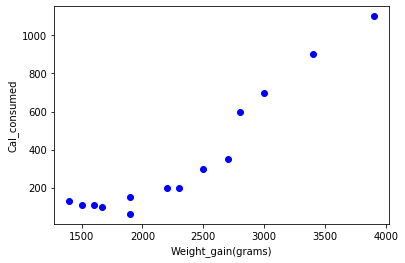

In [9]:
plt.plot(cal_cons.Cal,cal_cons.Wt_gain,'bo')
plt.xlabel("Weight_gain(grams)")
plt.ylabel("Cal_consumed")

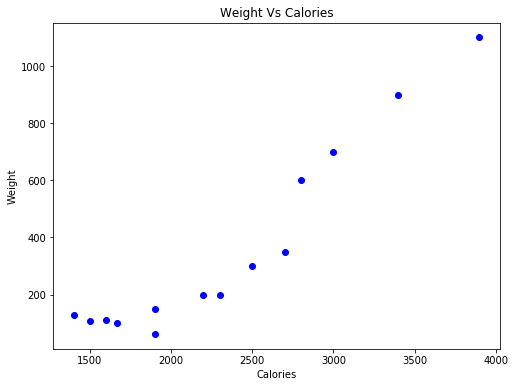

In [10]:
fig =plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set(title='Weight Vs Calories',
      xlabel='Calories', ylabel='Weight')
plt.plot(cal_cons.Cal,cal_cons.Wt_gain,'bo')

In [11]:
cal_cons.Cal.corr(cal_cons.Wt_gain)

0.9469910088554458

In [12]:
np.corrcoef(cal_cons.Wt_gain,cal_cons.Cal)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [13]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Wt_gain~Cal',data=cal_cons)

In [14]:
linear_result1= linear_model.fit()

In [15]:
print(linear_result1.params)
print(linear_result1.summary())

Intercept   -625.752356
Cal            0.420157
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Wt_gain   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           2.86e-07
Time:                        20:22:26   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\ABHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [16]:
print(linear_result1.conf_int(0.05))

                    0           1
Intercept -845.426655 -406.078057
Cal          0.330506    0.509807


In [17]:
pred_val = linear_result1.predict(cal_cons.Cal)

In [18]:
pred_val

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

Text(0, 0.5, 'Cal_consumed')

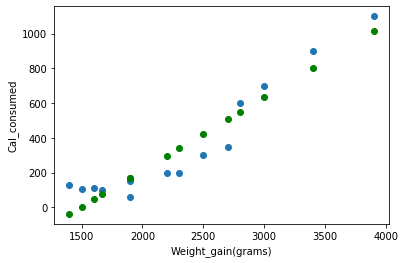

In [19]:
import matplotlib.pylab as plt
plt.scatter(x=cal_cons.Cal,y=cal_cons.Wt_gain)
plt.plot(cal_cons.Cal,pred_val,'go')
plt.xlabel("Weight_gain(grams)")
plt.ylabel("Cal_consumed")

In [20]:
model_log = smf.ols("Wt_gain~np.log(Cal)",data=cal_cons)
result_log = model_log.fit()
print(result_log.params)
print(result_log.summary())

Intercept     -6955.650125
np.log(Cal)     948.371723
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Wt_gain   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.25e-05
Time:                        20:22:27   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\ABHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [21]:
model_exp = smf.ols("np.log(Wt_gain)~Cal",data=cal_cons)
result_exp = model_exp.fit()
print(result_exp.params)
print(result_exp.summary())

Intercept    2.838672
Cal          0.001134
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        np.log(Wt_gain)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           8.02e-07
Time:                        20:22:27   Log-Likelihood:                -3.3244
No. Observations:                  14   AIC:                             10.65
Df Residuals:                      12   BIC:                             11.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

C:\Users\ABHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [22]:
cal_cons["Cal_sq"]=cal_cons.Cal*cal_cons.Cal
model_quad = smf.ols("Wt_gain ~ Cal + Cal_sq",data=cal_cons)
result_quad = model_quad.fit()
print(result_quad.params)
print(result_quad.summary())

Intercept    203.258458
Cal           -0.291894
Cal_sq         0.000140
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Wt_gain   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.2
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           5.55e-08
Time:                        20:22:27   Log-Likelihood:                -79.425
No. Observations:                  14   AIC:                             164.9
Df Residuals:                      11   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

C:\Users\ABHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [23]:
print(result_quad.conf_int(0.05))

                    0           1
Intercept -332.955294  739.472210
Cal         -0.736713    0.152925
Cal_sq       0.000053    0.000226


In [24]:
pred_quad = result_quad.predict(cal_cons)

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_quar = sqrt(mean_squared_error(cal_cons.Wt_gain,pred_quad))
print(rmse_quar)

70.40751529831554


In [26]:
rmse_lin = sqrt(mean_squared_error(cal_cons.Wt_gain,pred_val))
print(rmse_lin)

103.30250194726932


Text(0, 0.5, 'Cal_consumed')

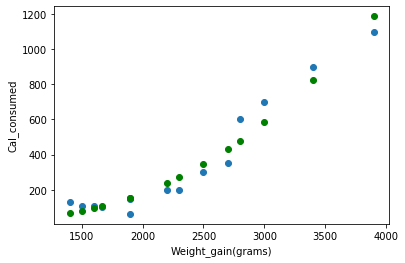

In [27]:
import matplotlib.pylab as plt
plt.scatter(x=cal_cons.Cal,y=cal_cons.Wt_gain)
plt.plot(cal_cons.Cal,pred_quad,'go')
plt.xlabel("Weight_gain(grams)")
plt.ylabel("Cal_consumed")

### We will consider Quadratic Model as R^2 and RMSE of quadratic linear model is more satisfying than other models.